In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Loading Dataset

df = pd.read_csv(r"C:\Users\Muhammad Ali\Desktop\Devs Hub\Churn_Modelling.csv")

print("------------------------------------------------------")
print("Dataset Loaded Successfully!")
print("First 5 Rows:")
display(df.head())

print("\nChecking for Missing Values:")
print(df.isnull().sum())
print("------------------------------------------------------\n")


------------------------------------------------------
Dataset Loaded Successfully!
First 5 Rows:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



Checking for Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
------------------------------------------------------



In [3]:
# Select Features and Target Variable


# Selecting relevant feature columns
X = df.iloc[:, 3:13]  # CreditScore → EstimatedSalary
y = df.iloc[:, 13]    # Exited column (0/1)

print("Selected Feature Columns:")
print(list(X.columns))
print("\nTarget variable: Exited\n")


Selected Feature Columns:
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

Target variable: Exited



In [4]:
# Encode Categorical Variables

print("Encoding categorical features...")

# Label Encoding for Gender (Female=0, Male=1)
gender_encoder = LabelEncoder()
X['Gender'] = gender_encoder.fit_transform(X['Gender'])

# One-Hot Encoding for Geography
column_transformer = ColumnTransformer(
    transformers=[
        ('geo_encoder', OneHotEncoder(drop='first'), ['Geography'])
    ],
    remainder='passthrough'
)

X = np.array(column_transformer.fit_transform(X))

print("Encoding Completed Successfully.\n")


Encoding categorical features...
Encoding Completed Successfully.



In [5]:
#  Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Data successfully split into Training and Testing sets.\n")


Data successfully split into Training and Testing sets.



In [6]:
#  Model Training (Random Forest)

print("Training Random Forest Classifier...")

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

print("Model Training Completed!\n")


Training Random Forest Classifier...
Model Training Completed!



In [7]:
# Model Evaluation

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("------------------------------------------------------")
print("Model Evaluation Results")
print("------------------------------------------------------")
print(f"Accuracy: {accuracy:.4f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)
print("------------------------------------------------------\n")


------------------------------------------------------
Model Evaluation Results
------------------------------------------------------
Accuracy: 0.8675

Confusion Matrix:
[[1549   58]
 [ 207  186]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

------------------------------------------------------



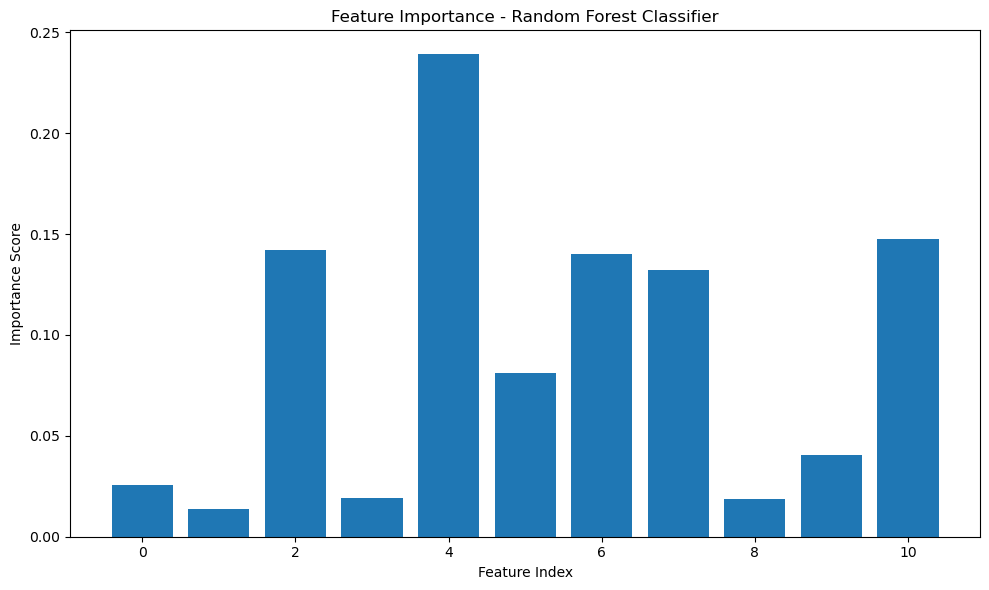

In [8]:
#  Feature Importance Visualization

importances = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances)
plt.title("Feature Importance - Random Forest Classifier")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


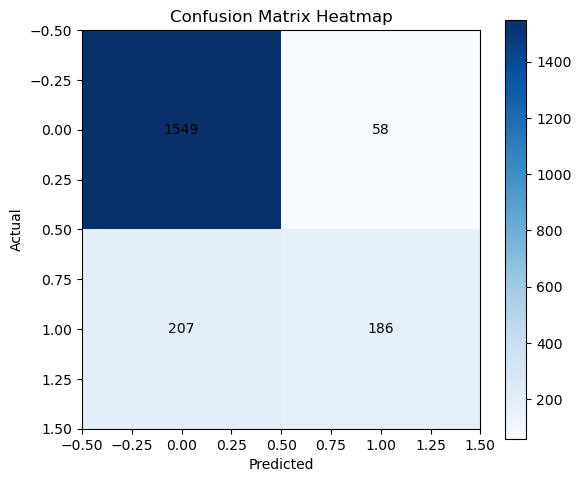

In [9]:
#  Confusion Matrix Heatmap

plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.colorbar()

# Annotate values
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j, i, cm[i][j], ha='center', va='center', color='black')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


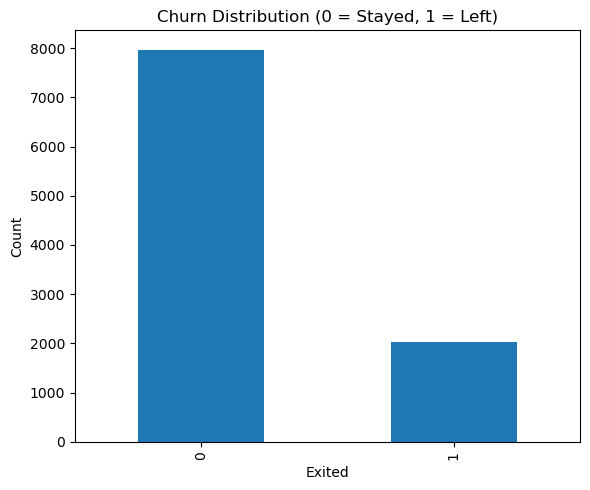

In [10]:
# Churn Distribution

plt.figure(figsize=(6, 5))
df['Exited'].value_counts().plot(kind='bar')
plt.title("Churn Distribution (0 = Stayed, 1 = Left)")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
